In [2]:
#Importando pacotes
import matplotlib.pyplot as plt
import pandas as pd
import requests as req
from statsmodels.graphics.tsaplots import quarter_plot
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



In [3]:
url = 'https://apisidra.ibge.gov.br/values/t/5932/n1/all/v/6561,6562,6563,6564/p/all/c11255/90687,90691,90696,90707,93404,93405,93406,93407,93408/d/v6561%201'
r = req.get(url)
raw = r.json()

In [4]:
# CRIANDO AS FUNÇÕES NECESSÁRIAS



def create_df(var):
    '''
    Essa função separa os dataframe bruto entre as variáveis 6561,6562,6563,6564
    Ela trata os dados e inclui no dicionário var_dict onde a key é a variável e o value é o dataframe
    var é a variável
    '''
    df_var = df.loc[df['Variável (Código)']==var].copy()
    df_var['Trimestre (Código)'] = df_var['Trimestre (Código)'].map(str).str[:4] + 'Q' + df_var['Trimestre (Código)'].map(str).str[-1]
    df_var['ano'] = df_var['Trimestre (Código)'].map(str).str[:4]
    df_var = df_var.apply(pd.to_numeric, errors='ignore')
    df_var['Trimestre'] = pd.to_datetime(df_var['Trimestre (Código)']).dt.to_period('Q')
    df_var['Trimestre (string)'] = df_var['Trimestre'].astype('str')
    current_year = df_var['Trimestre'].dt.year.values[-1]
    df_var = df_var.loc[df_var['Trimestre'].dt.year >=current_year-5]
    var_dict[var] = df_var


def plot_sector(var, sector):
    sns.set_theme()
    '''
    Esta função gera um gráfico para uma determinada variável e setor do PIB, os valores dizem respeito
    a variação de volume
    var é a variável que pode ser 6561, 6562, 6563, 6564 para a descrição visite https://apisidra.ibge.gov.br
    sector é setor do PIB
    '''
    dict_convert = {'Agropecuária - total': 'Agropecuária',
                    'Indústria - total': 'Indústria',
                    'Serviços - total': 'Serviços',
                    'PIB a preços de mercado': 'PIB a preços de mercado',
                    'Despesa de consumo das famílias': 'Consumo das Famílias',
                    'Despesa de consumo da administração pública': 'Consumo do Governo',
                    'Formação bruta de capital fixo': 'FBKF',
                    'Exportação de bens e serviços': 'Exportação',
                    'Importação de bens e serviços (-)': 'Importação'}

    title = dict_convert[sector]
    var = str(var)
    data = var_dict[var]
    data[['Valor', 'Setores e subsetores', 'Trimestre', 'Trimestre (string)', 'ano']]  # colunas de interesse
    line = data[data['Setores e subsetores'] == sector]  # filtra o setor
    line.reset_index(inplace=True, drop=True)
    
    # Início do Plot
    plt.figure(figsize=(8, 4))
    palette = np.where(line['Valor'] >= 0, 'blue', 'red')
    sns.barplot(x='Trimestre (string)', y='Valor', data=line, palette=palette)

    plt.xlabel('Data')
    plt.ylabel('%', rotation=0)

    # configurando os xticks
    ticks_positions = [line[line['ano'] == year].index[0] for year in line['ano'].unique()]
    plt.xticks(ticks_positions, line['ano'].unique())

    # Add a little mark at each tick position (e.g., vertical line)
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=5)    

    # cria anotação no gráfico
    plt.annotate('fonte: IBGE, elaboração própria', (0, 0), (0, -30),
                 fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

    # cria o título
    plt.title(f'{title} (Variação QoQ interanual)', fontsize=14)
    plt.show()

    

In [5]:
df = pd.DataFrame(raw)
df.columns = df.iloc[0]
df.drop(0, inplace=True)
df.drop(df.columns[[0,1,2,3,5,6,8,10,11]], axis=1, inplace=True)

#A lista de setores está na set_list
set_list = list(df['Setores e subsetores'].unique())


var_dict = {}


#ANÁLISE PIB Trimestral Volume TABELA 5932
for var in list(df['Variável (Código)'].unique()):
    create_df(var)




C:\Users\mkenj\AppData\Local\Temp\ipykernel_11648\1265405386.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_var['Trimestre'] = pd.to_datetime(df_var['Trimestre (Código)']).dt.to_period('Q')
C:\Users\mkenj\AppData\Local\Temp\ipykernel_11648\1265405386.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_var['Trimestre'] = pd.to_datetime(df_var['Trimestre (Código)']).dt.to_period('Q')
C:\Users\mkenj\AppData\Local\Temp\ipykernel_11648\1265405386.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_var['Trimestre'] = pd.to_datetime(df_var['Trimestre (Código)']).d

# Análise da variável 6561
Essa é a taxa de variação do trimestre contra o mesmo trimestre do ano anterior, fica evidente o choque da COVID 19 na maioria dos setores

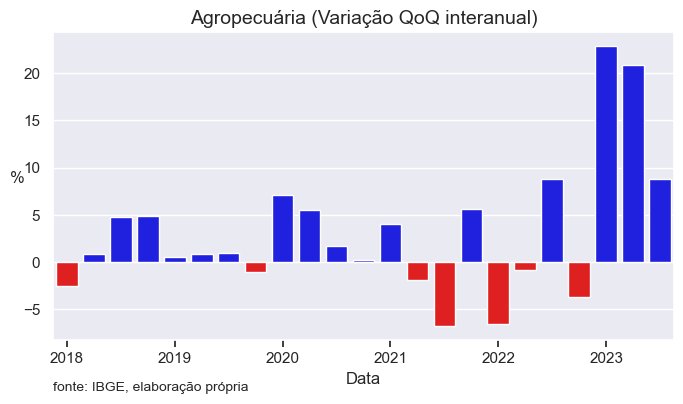

In [52]:
plot_sector(6561, set_list[0])

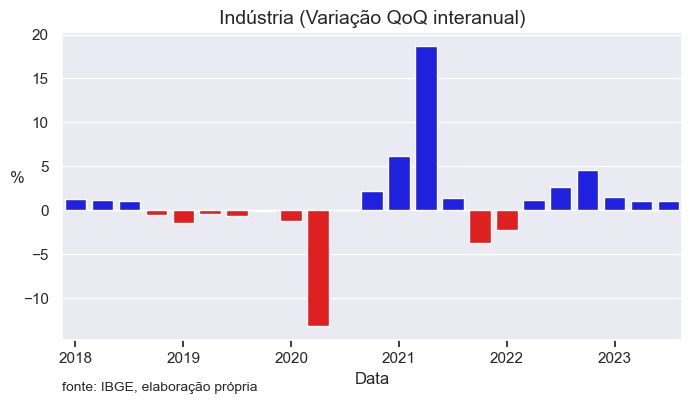

In [53]:
plot_sector(6561, set_list[1])

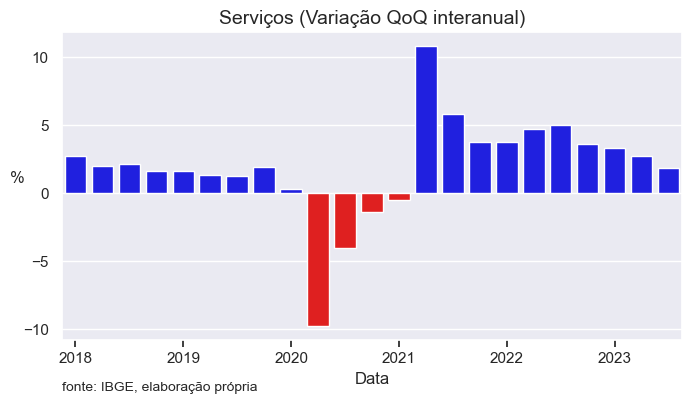

In [54]:
plot_sector(6561, set_list[2])

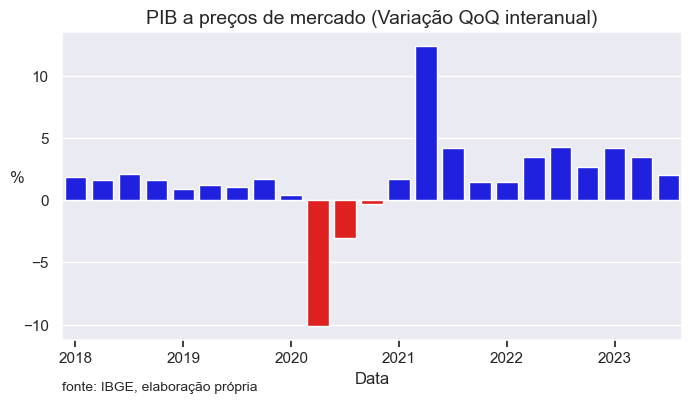

In [65]:
plot_sector(6561, set_list[3])

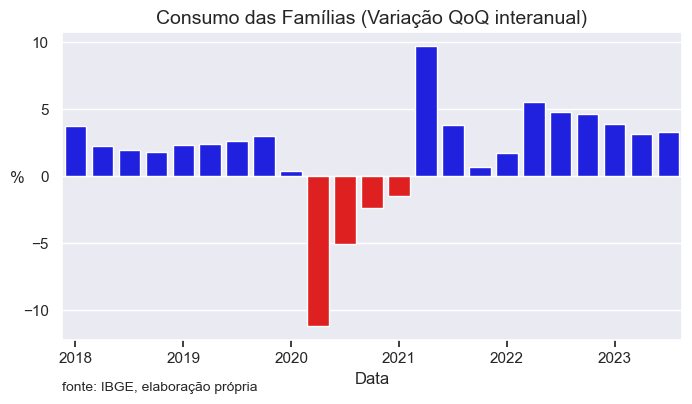

In [56]:
plot_sector(6561, set_list[4])

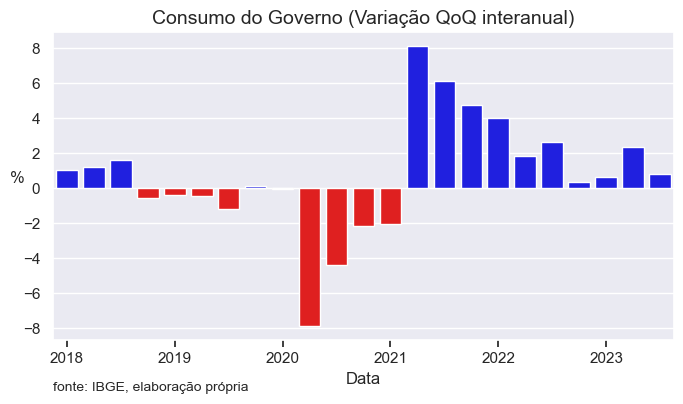

In [58]:
plot_sector(6561, set_list[5])

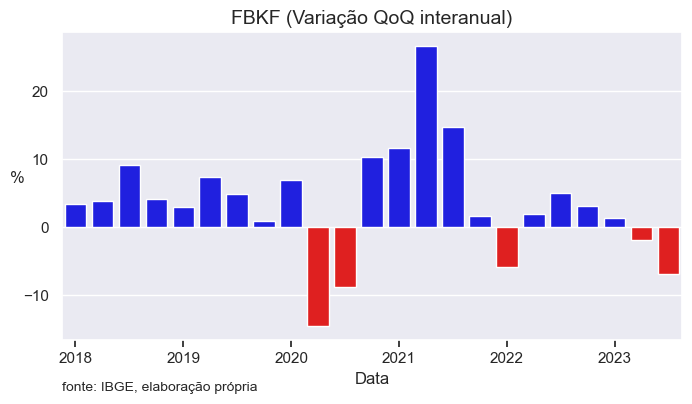

In [59]:
plot_sector(6561, set_list[6])

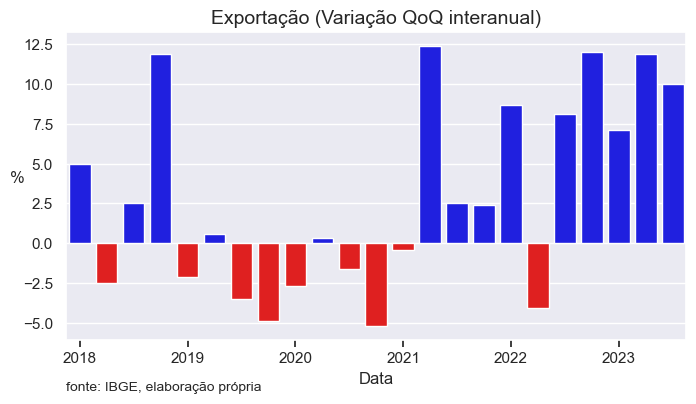

In [60]:
plot_sector(6561, set_list[7])

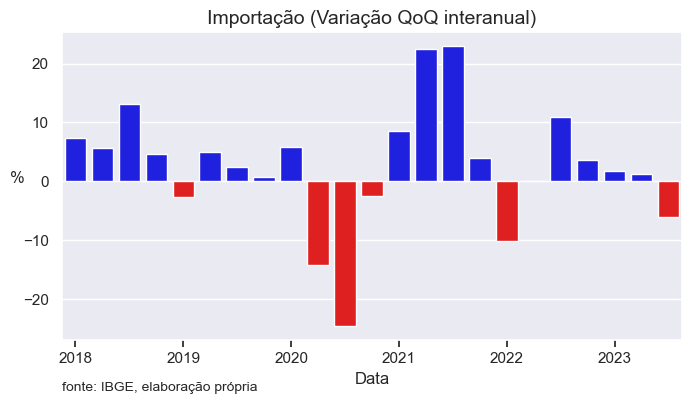

In [63]:
plot_sector(6561, set_list[8])

# Análise da variável 6562
Essa é a taxa de variação do acumulado dos últimos 4 trimestres em relação ao mesmo período do ano anterior. Novamente é possível observar o impacto da pandemia na maioria dos setores.

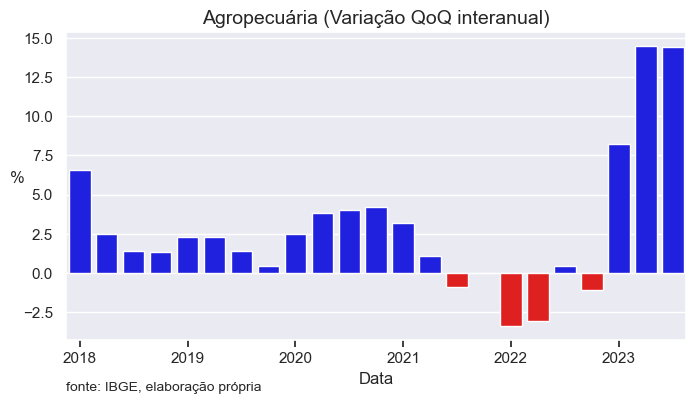

In [67]:
plot_sector(6562, set_list[0])

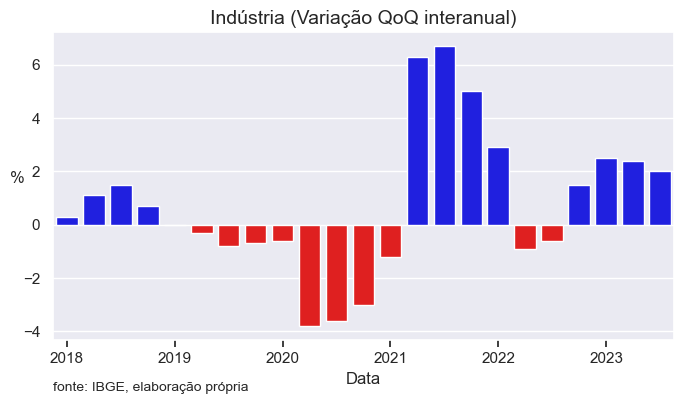

In [68]:
plot_sector(6562, set_list[1])

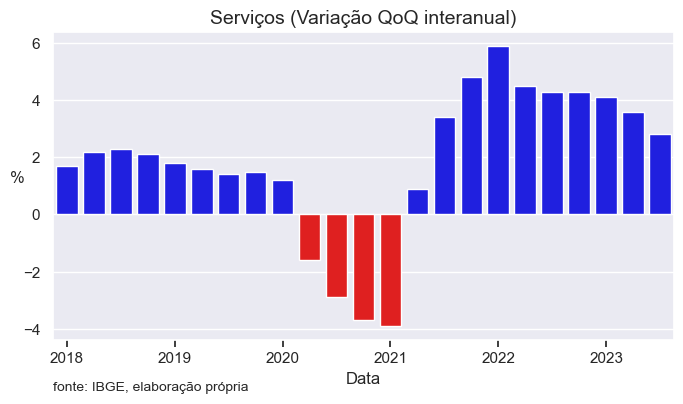

In [69]:
plot_sector(6562, set_list[2])

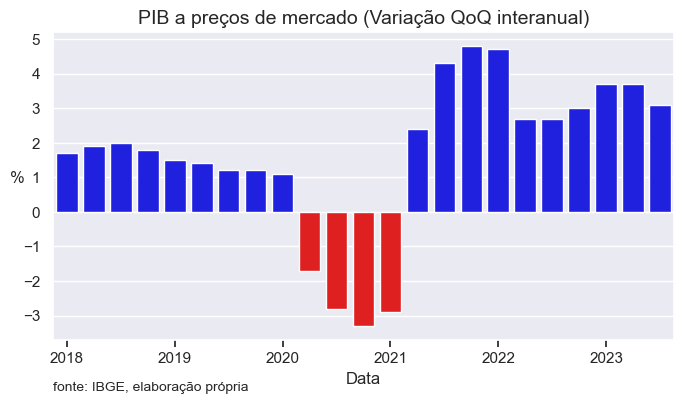

In [70]:
plot_sector(6562, set_list[3])

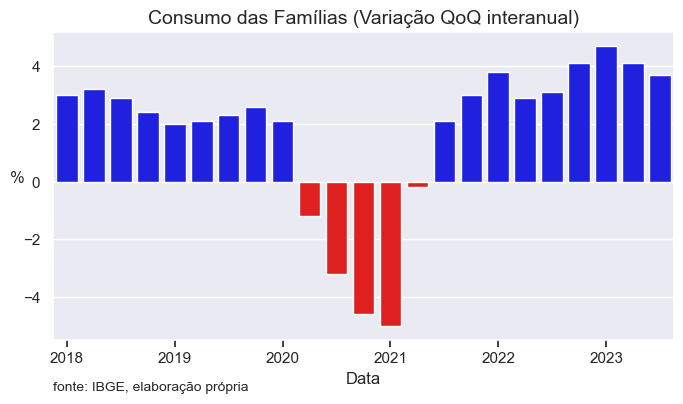

In [71]:
plot_sector(6562, set_list[4])

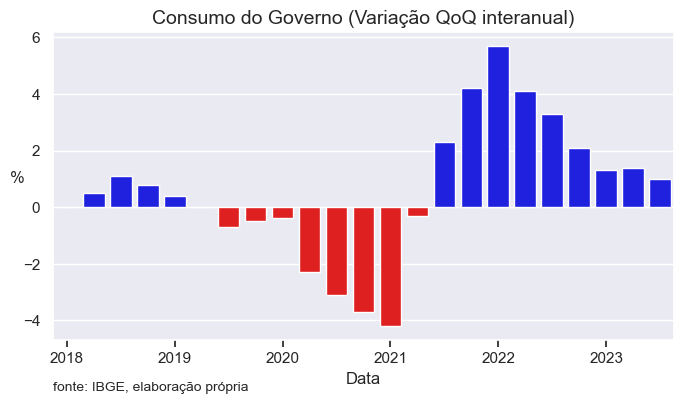

In [72]:
plot_sector(6562, set_list[5])

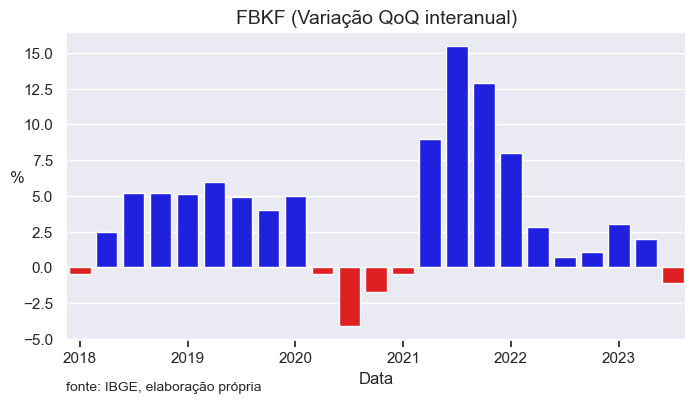

In [73]:
plot_sector(6562, set_list[6])

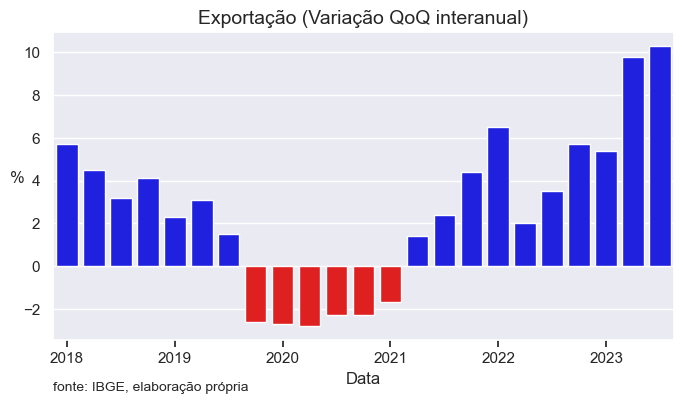

In [74]:
plot_sector(6562, set_list[7])

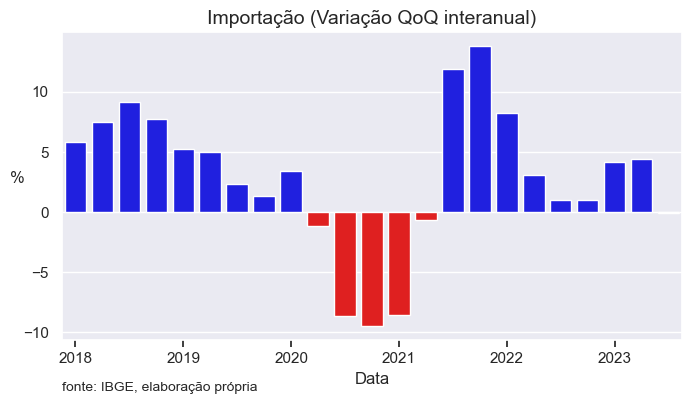

In [75]:
plot_sector(6562, set_list[8])

# Análise da variável 6563
Essa é a taxa de variação do acumulado no ano em relação ao mesmo período do ano anterior. Novamente é possível observar o impacto da pandemia na maioria dos setores.

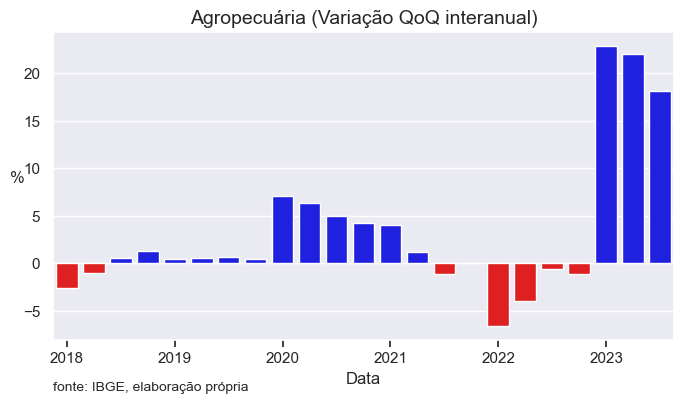

In [6]:
plot_sector(6563, set_list[0])

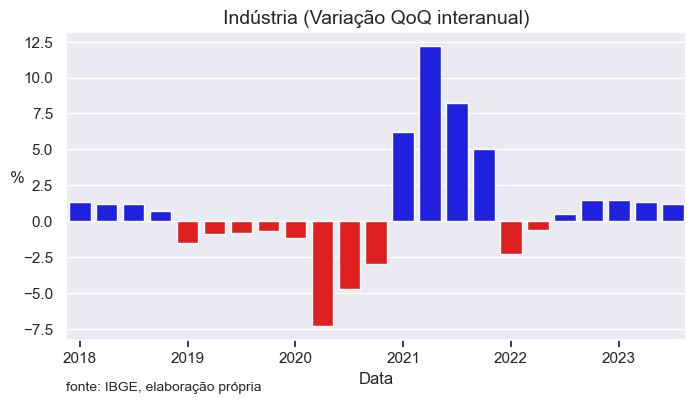

In [10]:
plot_sector(6563, set_list[1])

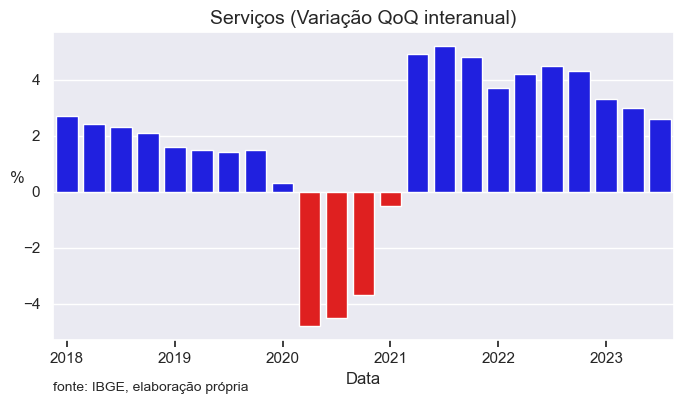

In [11]:
plot_sector(6563, set_list[2])

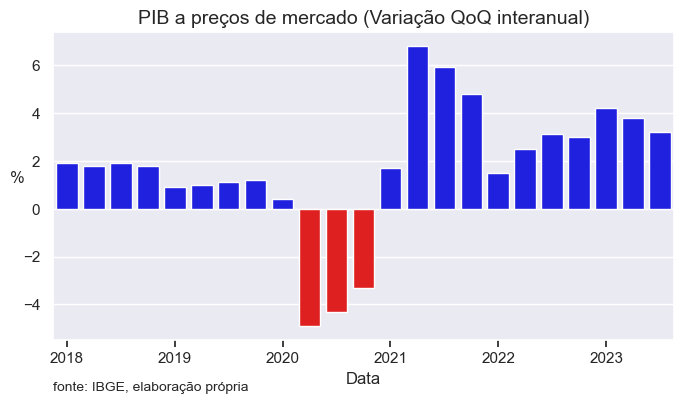

In [12]:
plot_sector(6563, set_list[3])

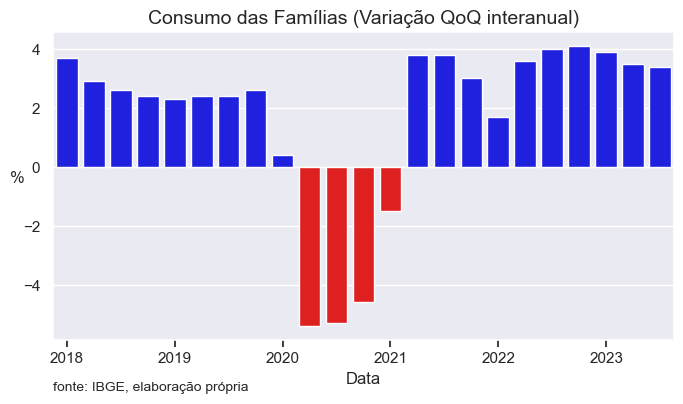

In [13]:
plot_sector(6563, set_list[4])

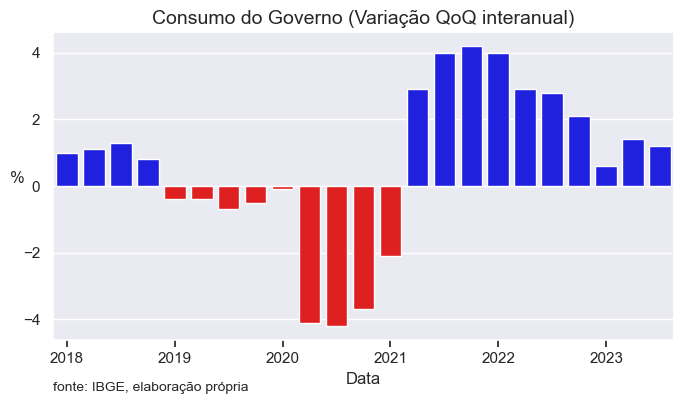

In [14]:
plot_sector(6563, set_list[5])

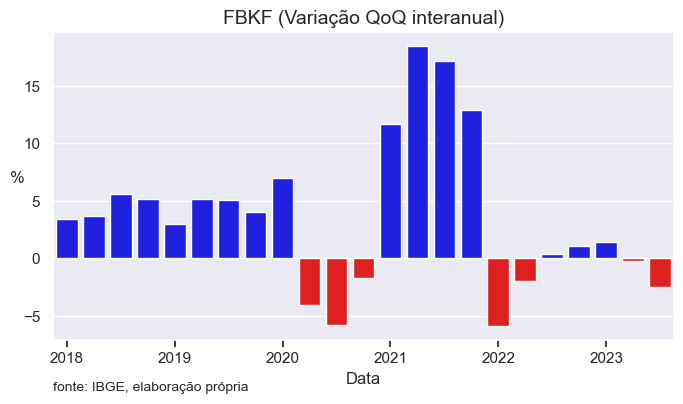

In [15]:
plot_sector(6563, set_list[6])

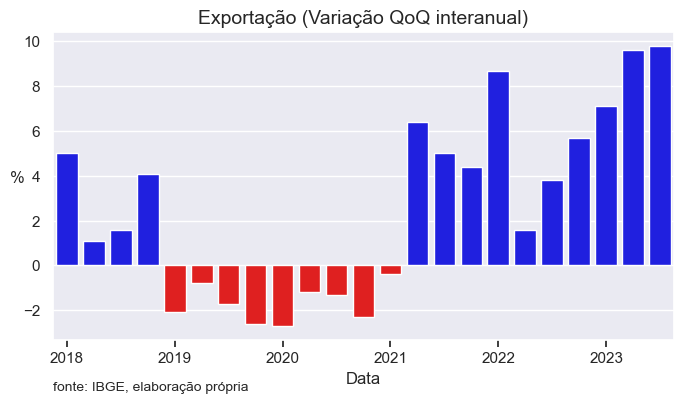

In [17]:
plot_sector(6563, set_list[7])

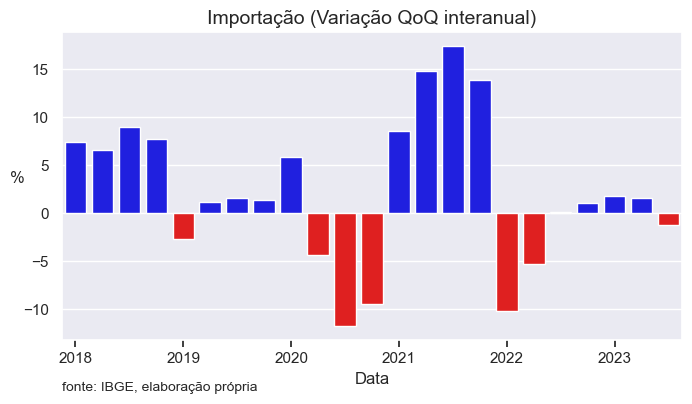

In [18]:
plot_sector(6563, set_list[8])